In [1]:
import pandas as pd
data_par = pd.read_excel('reto.xlsx', sheet_name='parametros_iniciales_lote')
data_fri = pd.read_excel('reto.xlsx', sheet_name='calidad_friabilidad')
data_pro = pd.read_excel('reto.xlsx', sheet_name='protocolos_produccion', skiprows=1)

data_par.head()

,indice_lote,parametro,unidad,valor_nominal_1,valor_nominal_2
0,1,Altura de alma compresión principal,mm,2.3,2.3
1,1,Altura de alma precompresión,mm,3.4,3.4
2,1,Ángulo 1. chapaleta presión negativa,°,50,-
3,1,Ángulo 2. chapaleta presión negativa,°,60,-
4,1,Arrastre dispositivo de llenado,s,0,-


In [2]:
data_fri.head()

,indice_lote,Friabilidad (%)
0,32,0.0028
1,33,0.0025
2,46,0.0038
3,47,0.0038
4,49,0.0029


In [3]:
merged_df = pd.merge(left=data_par,right=data_fri,on='indice_lote',how='outer')
merged_df.nunique()

indice_lote         60
parametro          141
unidad              37
valor_nominal_1    190
valor_nominal_2    145
Friabilidad (%)     33
dtype: int64

In [4]:
# First, let's check for duplicates
duplicates = merged_df.groupby(['indice_lote', 'parametro']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

print("Duplicate combinations of indice_lote and parametro:")
print(duplicates)

# Now let's handle the duplicates by aggregating
# You can choose different aggregation methods: 'first', 'last', 'mean', 'max', etc.
df_clean = merged_df.groupby(['indice_lote', 'parametro'], as_index=False)['valor_nominal_1'].first()

# Now we can pivot
df_pivoted = df_clean.pivot(
    index='indice_lote',
    columns='parametro',
    values='valor_nominal_1'
)

# Clean up column names
df_pivoted.columns = df_pivoted.columns.str.replace(' ', '_').str.lower()

# Reset index
df_pivoted = df_pivoted.reset_index()

print("\nShape of pivoted dataframe:", df_pivoted.shape)
print("\nFirst few rows of pivoted dataframe:")
df_pivoted

# Optional: Save to CSV
# df_pivoted.to_csv('reshaped_data.csv', index=False)

Duplicate combinations of indice_lote and parametro:
Empty DataFrame
Columns: [indice_lote, parametro, count]
Index: []

Shape of pivoted dataframe: (60, 142)

First few rows of pivoted dataframe:


parametro,indice_lote,altura_de_alma_compresión_intermedia,altura_de_alma_compresión_principal,altura_de_alma_precompresión,arrastre_dispositivo_de_llenado,avance_dispositivo_de_llenado,campo_regulación_control_externa_velocidad,cantidad_comprimidos_de_muestra,checkmaster:_giro_estrella,checkmaster:_velocidad_vibrador_circular,...,tipo_punzón/_forma_cabezal,vacío_de_aspiración,valor_numérico_fuerza_de_compresión,velocidad_rotor,velocidad_dispositivo_de_llenado,vigilancia_agujas_desconexión,válvula_reguladora_de_presión_cortina_del_aire,válvula_reguladora_de_presión_separación,ángulo_1._chapaleta_presión_negativa,ángulo_2._chapaleta_presión_negativa
0,1,NaN,2.3,3.4,0,0,0,60,3,7,...,6,1,110,-,110,0,1.5,4,50,60
1,2,NaN,2.33,3.4,0,0,0,60,3,7,...,6,1,110,None,110,0,1.5,4,65,80
2,3,NaN,2.33,3.4,0,0,0,60,3,7,...,6,1,110,None,110,0,1.5,4,90,90
3,4,NaN,2.14,3.3,0,0,0,60,3,7,...,6,1,110,None,100,0,1.5,4.5,90,90
4,5,NaN,2.35,3.4,0,0,0,20,1,2,...,6,1.1,110,None,105,0,1.5,6,85,60
5,6,NaN,2.4,3.4,0,0,0,60,3,7,...,6,2,110,None,120,0,0.4,4,15,15
6,7,NaN,2,3.2,0,0,0,60,3,7,...,6,1,110,-,75,0,0.4,4,6,15
7,8,NaN,2.14,3.3,0,0,0,60,3,7,...,6,1,110,-,110,0,0.4,4,6,15
8,9,NaN,2.08,3.3,0,0,0,60,3,7,...,6,1,110,-,110,0,0.4,4,6,15
9,10,NaN,1.8,3,0,0,0,60,3,7,...,6,1,110,None,70,0,0.4,4,6,15


In [5]:
list(df_pivoted.columns)

['indice_lote',
 'altura_de_alma_compresión_intermedia',
 'altura_de_alma_compresión_principal',
 'altura_de_alma_precompresión',
 'arrastre_dispositivo_de_llenado',
 'avance_dispositivo_de_llenado',
 'campo_regulación_control_externa_velocidad',
 'cantidad_comprimidos_de_muestra',
 'checkmaster:_giro_estrella',
 'checkmaster:_velocidad_vibrador_circular',
 'checkmaster:_ángulo_de_giro_vibrador',
 'ciclo_tobera',
 'circuito_de_lubricación_1_abajo',
 'circuito_de_lubricación_1_–_cabeza_y_vástago_inferior',
 'circuito_de_lubricación_1_—_cabeza_y_vástago_inferior',
 'circuito_de_lubricación_2_arriba',
 'circuito_de_lubricación_2_–_cabeza_superior',
 'circuito_de_lubricación_2_—_cabeza_superior',
 'circuito_de_lubricación_3_–_vástago_superior',
 'circuito_de_lubricación_3-vástago_superior',
 'compresión_intermedia:_valor_medio_max.',
 'comprimidos_buenos',
 'comprimidos_dureza:_-límite',
 'comprimidos_grosor:_número_comprimidos',
 'comprimidos_malos',
 'comprimidos_malos_permitidos',
 'com

In [6]:
# las 9 variables con las que se trabaja

df_pivot_ss = df_pivoted[['indice_lote','profundidad_llenado', 'altura_de_alma_precompresión', 'velocidad_rotor', 'velocidad_dispositivo_de_llenado', 'fuerza_de_compresión_principal:_valor_medio', 'fuerza_de_compresión_principal:_s-rel','precompresión:_valor_medio', 'altura_de_alma_compresión_principal']]
df_pivot_ss

parametro,indice_lote,profundidad_llenado,altura_de_alma_precompresión,velocidad_rotor,velocidad_dispositivo_de_llenado,fuerza_de_compresión_principal:_valor_medio,fuerza_de_compresión_principal:_s-rel,precompresión:_valor_medio,altura_de_alma_compresión_principal
0,1,9.8,3.4,-,110,26,10,0,2.3
1,2,8.9,3.4,None,110,25,10,0,2.33
2,3,9.2,3.4,None,110,24,10,0,2.33
3,4,9,3.3,None,100,44,10,0,2.14
4,5,9.7,3.4,None,105,22,10,0,2.35
5,6,9.4,3.4,None,120,23,10,0,2.4
6,7,8.6,3.2,-,75,39,10,0,2
7,8,8.9,3.3,-,110,36,10,0,2.14
8,9,8.9,3.3,-,110,40,10,0,2.08
9,10,8.1,3,None,70,0,10,0,1.8


In [7]:
data_pro.nunique()

indice_lote                      60
Estación                          2
Fecha                            50
Hora                           1043
Tipo                              6
Producción\nAcumulada x1000     534
PreC VM\n[kN]                   634
CPVM\n[kN]                      882
Srel\n[%]                       111
n                                31
VM\n[mg]                        277
Mín\n[mg]                       344
Máx\n[mg]                       298
Srel\n[%].1                     118
n.1                              31
VM\n[mm]                         24
Srel\n[%].2                     112
n.2                              31
VM\n[kp]                         91
Srel\n[%].3                     708
n.3                              28
VM\n[mm].1                       18
Srel\n[%].4                      19
dtype: int64

In [8]:
column_mapping = {
    'PreC VM\n[kN]': 'PreC VM[kN]',
    'CPVM\n[kN]': 'CPVM[kN]',
    'VM\n[kp]': 'VM[kp]'
}
###### REMEMBER ITS AVERAGE SCORE FOR 15 YEAR OLDS 
# Rename the columns
data_pro = data_pro.rename(columns=column_mapping)
data_pro

,indice_lote,Estación,Fecha,Hora,Tipo,Producción\nAcumulada x1000,PreC VM[kN],CPVM[kN],Srel\n[%],n,...,Srel\n[%].1,n.1,VM\n[mm],Srel\n[%].2,n.2,VM[kp],Srel\n[%].3,n.3,VM\n[mm].1,Srel\n[%].4
0,32,1.0,2023-06-19,22:02:05,M,22,2.16,24.90,6.0,10,...,1.09,10,5.58,0.60,10,11.9,5.71,10,21.01,0.05
1,32,1.0,2023-06-19,22:06:16,M,43,2.76,26.93,6.6,10,...,1.27,10,5.61,0.56,10,11.8,6.36,10,21.01,0.06
2,32,1.0,2023-06-19,22:28:45,M,157,2.88,26.26,6.4,10,...,1.21,10,5.60,0.55,10,11.3,7.48,10,21.01,0.02
3,32,1.0,2023-06-19,23:42:56,M,426,3.73,29.76,6.6,10,...,0.98,10,5.65,0.44,10,11.9,7.12,10,21.02,0.11
4,32,1.0,2023-06-20,00:02:29,M,530,3.07,25.94,6.3,10,...,0.93,10,5.62,0.47,10,12.0,5.54,10,21.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,35,2.0,2023-03-23,00:26:58,M,468,7.51,39.98,4.7,45,...,0.61,45,5.64,0.42,45,5.8,10.51,45,21.10,0.03
1094,35,2.0,2023-03-23,01:00:08,M,612,7.70,41.02,4.1,45,...,0.64,45,5.67,0.46,45,5.9,11.57,45,21.10,0.02
1095,35,2.0,2023-03-23,01:24:09,M,723,8.04,41.93,5.1,45,...,0.99,45,5.65,0.66,45,5.6,12.29,45,21.10,0.03
1096,35,2.0,2023-03-23,01:49:16,M,840,7.66,40.97,4.9,45,...,0.99,45,5.64,0.72,45,5.7,11.72,45,21.10,0.03


In [9]:
data_pro_sub = data_pro.groupby('indice_lote')[['PreC VM[kN]', 'CPVM[kN]', 'VM[kp]']].mean()
data_pro_sub = data_pro_sub.merge(data_fri, how ='left', on='indice_lote')
data_pro_sub

,indice_lote,PreC VM[kN],CPVM[kN],VM[kp],Friabilidad (%)
0,1,5.303500,29.523000,6.450000,0.0025
1,2,5.082778,33.715556,6.372222,0.0038
2,3,5.988182,27.991364,7.145455,0.0047
3,4,4.998125,38.283125,8.418750,0.0068
4,5,5.807917,33.348333,9.891667,0.0025
5,6,6.203750,20.213125,5.687500,0.0033
6,7,10.831154,38.080385,5.957692,0.0066
7,8,7.520625,37.697500,5.293750,0.0065
8,9,16.563333,51.413333,6.273333,0.0066
9,10,9.758000,55.506333,7.046667,0.0075


In [10]:
# USE ONLY THE SUBSET OR THE FULL
df = df_pivot_ss.merge(data_pro_sub, how ='left', on='indice_lote')
# df = df_pivoted.merge(data_pro_sub, how ='left', on='indice_lote')
df.nunique()

indice_lote                                    60
profundidad_llenado                            33
altura_de_alma_precompresión                   14
velocidad_rotor                                 5
velocidad_dispositivo_de_llenado               11
fuerza_de_compresión_principal:_valor_medio    27
fuerza_de_compresión_principal:_s-rel           1
precompresión:_valor_medio                      3
altura_de_alma_compresión_principal            27
PreC VM[kN]                                    60
CPVM[kN]                                       60
VM[kp]                                         60
Friabilidad (%)                                33
dtype: int64

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [12]:
df = pd.DataFrame(df)
# df = df.drop(columns = 'VM[mg]')
df.nunique()

indice_lote                                    60
profundidad_llenado                            33
altura_de_alma_precompresión                   14
velocidad_rotor                                 5
velocidad_dispositivo_de_llenado               11
fuerza_de_compresión_principal:_valor_medio    27
fuerza_de_compresión_principal:_s-rel           1
precompresión:_valor_medio                      3
altura_de_alma_compresión_principal            27
PreC VM[kN]                                    60
CPVM[kN]                                       60
VM[kp]                                         60
Friabilidad (%)                                33
dtype: int64

In [13]:
# Quitar esta variable pq tiene muchos datos faltantes o '-'
# df = df.drop(columns=['velocidad_rotor'])
# df['velocidad_rotor'] = df['velocidad_rotor'].fillna(0)

In [14]:
df.replace(to_replace='-', value=np.nan, inplace=True)

C:\Users\delca\AppData\Local\Temp\ipykernel_33696\2934628673.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace='-', value=np.nan, inplace=True)


In [15]:
df

,indice_lote,profundidad_llenado,altura_de_alma_precompresión,velocidad_rotor,velocidad_dispositivo_de_llenado,fuerza_de_compresión_principal:_valor_medio,fuerza_de_compresión_principal:_s-rel,precompresión:_valor_medio,altura_de_alma_compresión_principal,PreC VM[kN],CPVM[kN],VM[kp],Friabilidad (%)
0,1,9.80,3.40,NaN,110.0,26.0,10.0,0.0,2.30,5.303500,29.523000,6.450000,0.0025
1,2,8.90,3.40,NaN,110.0,25.0,10.0,0.0,2.33,5.082778,33.715556,6.372222,0.0038
2,3,9.20,3.40,NaN,110.0,24.0,10.0,0.0,2.33,5.988182,27.991364,7.145455,0.0047
3,4,9.00,3.30,NaN,100.0,44.0,10.0,0.0,2.14,4.998125,38.283125,8.418750,0.0068
4,5,9.70,3.40,NaN,105.0,22.0,10.0,0.0,2.35,5.807917,33.348333,9.891667,0.0025
5,6,9.40,3.40,NaN,120.0,23.0,10.0,0.0,2.40,6.203750,20.213125,5.687500,0.0033
6,7,8.60,3.20,NaN,75.0,39.0,10.0,0.0,2.00,10.831154,38.080385,5.957692,0.0066
7,8,8.90,3.30,NaN,110.0,36.0,10.0,0.0,2.14,7.520625,37.697500,5.293750,0.0065
8,9,8.90,3.30,NaN,110.0,40.0,10.0,0.0,2.08,16.563333,51.413333,6.273333,0.0066
9,10,8.10,3.00,NaN,70.0,0.0,10.0,0.0,1.80,9.758000,55.506333,7.046667,0.0075


In [16]:
# Assuming 'df' is your DataFrame
threshold = 0.2  # 20% threshold

# Calculate the percentage of NaN values in each column
nan_percentages = df.isnull().mean()

# Get the names of columns with more than 20% NaN values
columns_to_drop = nan_percentages[nan_percentages > threshold].index

print(f'Columns to drop\ndropped: {len(columns_to_drop)}: {columns_to_drop}')
# Drop these columns
df = df.drop(columns=columns_to_drop)

Columns to drop
dropped: 1: Index(['velocidad_rotor'], dtype='object')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   indice_lote                                  60 non-null     int64  
 1   profundidad_llenado                          59 non-null     float64
 2   altura_de_alma_precompresión                 59 non-null     float64
 3   velocidad_dispositivo_de_llenado             54 non-null     float64
 4   fuerza_de_compresión_principal:_valor_medio  59 non-null     float64
 5   fuerza_de_compresión_principal:_s-rel        59 non-null     float64
 6   precompresión:_valor_medio                   59 non-null     float64
 7   altura_de_alma_compresión_principal          59 non-null     float64
 8   PreC VM[kN]                                  60 non-null     float64
 9   CPVM[kN]                                     60 non-null     float64
 10  VM[k

In [18]:
df.fillna(round(df.mean(),2), inplace=True)

In [19]:
df.isnull().sum()

indice_lote                                    0
profundidad_llenado                            0
altura_de_alma_precompresión                   0
velocidad_dispositivo_de_llenado               0
fuerza_de_compresión_principal:_valor_medio    0
fuerza_de_compresión_principal:_s-rel          0
precompresión:_valor_medio                     0
altura_de_alma_compresión_principal            0
PreC VM[kN]                                    0
CPVM[kN]                                       0
VM[kp]                                         0
Friabilidad (%)                                0
dtype: int64

In [20]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to make the index
df = df.set_index('indice_lote')

In [21]:
df

,profundidad_llenado,altura_de_alma_precompresión,velocidad_dispositivo_de_llenado,fuerza_de_compresión_principal:_valor_medio,fuerza_de_compresión_principal:_s-rel,precompresión:_valor_medio,altura_de_alma_compresión_principal,PreC VM[kN],CPVM[kN],VM[kp],Friabilidad (%)
indice_lote,,,,,,,,,,,
1,9.80,3.40,110.00,26.00,10.0,0.00,2.30,5.303500,29.523000,6.450000,0.0025
2,8.90,3.40,110.00,25.00,10.0,0.00,2.33,5.082778,33.715556,6.372222,0.0038
3,9.20,3.40,110.00,24.00,10.0,0.00,2.33,5.988182,27.991364,7.145455,0.0047
4,9.00,3.30,100.00,44.00,10.0,0.00,2.14,4.998125,38.283125,8.418750,0.0068
5,9.70,3.40,105.00,22.00,10.0,0.00,2.35,5.807917,33.348333,9.891667,0.0025
6,9.40,3.40,120.00,23.00,10.0,0.00,2.40,6.203750,20.213125,5.687500,0.0033
7,8.60,3.20,75.00,39.00,10.0,0.00,2.00,10.831154,38.080385,5.957692,0.0066
8,8.90,3.30,110.00,36.00,10.0,0.00,2.14,7.520625,37.697500,5.293750,0.0065
9,8.90,3.30,110.00,40.00,10.0,0.00,2.08,16.563333,51.413333,6.273333,0.0066


Claude test

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame and 'target' is your target variable
X = df.drop(["Friabilidad (%)", 'VM[kp]'], axis=1)
y = df["Friabilidad (%)"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
lasso_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

# Set up the parameter grid for GridSearchCV
param_grid = {
    'regressor__alpha': [0.01, 1, 10, 100],
    'regressor__max_iter': [1000, 2000, 3000]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# If you want to see the coefficients of the Lasso model
lasso_coef = best_model.named_steps['regressor'].coef_
feature_names = X.columns

for feature, coef in zip(feature_names, lasso_coef):
    # if coef != 0:
        print(f"{feature}: {coef}")

Best parameters: {'regressor__alpha': 0.01, 'regressor__max_iter': 1000}
Mean Squared Error: 2.1049479166666667e-06
R-squared Score: -0.18315508021390348
profundidad_llenado: -0.0
altura_de_alma_precompresión: -0.0
velocidad_dispositivo_de_llenado: -0.0
fuerza_de_compresión_principal:_valor_medio: 0.0
fuerza_de_compresión_principal:_s-rel: 0.0
precompresión:_valor_medio: -0.0
altura_de_alma_compresión_principal: -0.0
PreC VM[kN]: 0.0
CPVM[kN]: 0.0


Other test

In [23]:
X = df.drop(["Friabilidad (%)", 'VM[kp]'], axis=1)
y = df["Friabilidad (%)"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (48, 9)
Shape of Test Features: (12, 9)
Shape of Train Target: (48,)
Shape of Test Target: (12,)


In [24]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': np.float64(1e-05)}


In [25]:
names=X.columns
print("Column Names: {}".format(names.values))

Column Names: ['profundidad_llenado' 'altura_de_alma_precompresión'
 'velocidad_dispositivo_de_llenado'
 'fuerza_de_compresión_principal:_valor_medio'
 'fuerza_de_compresión_principal:_s-rel' 'precompresión:_valor_medio'
 'altura_de_alma_compresión_principal' 'PreC VM[kN]' 'CPVM[kN]']


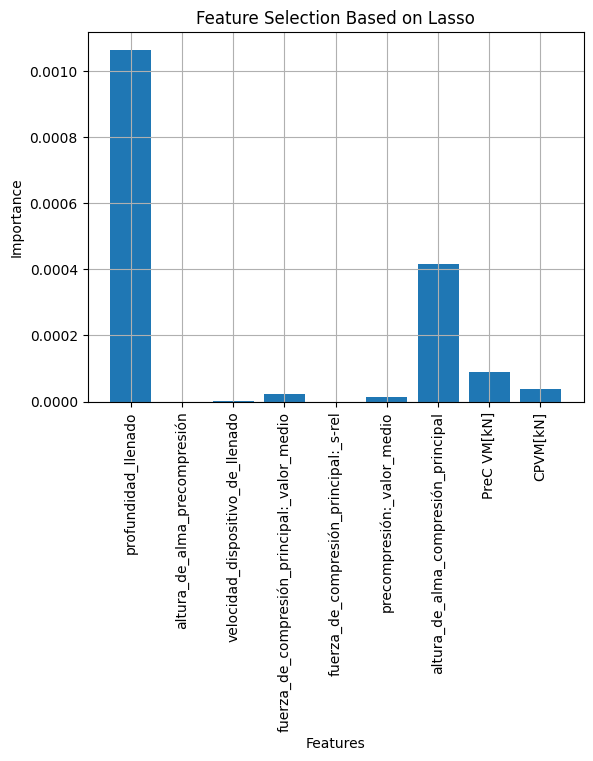

In [26]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
# plt.ylim(0, 0.15)
plt.show()

In [27]:
# Subsetting the features which has more than 0.001 importance.
feature_subset=np.array(names)[lasso1_coef>0.001]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures. 
feature_subset=np.append(feature_subset, "Friabilidad (%)")
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['profundidad_llenado']
Selected Columns: ['profundidad_llenado' 'Friabilidad (%)']


Otra forma

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [31]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,10,0.01)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [32]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
[CV 1/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 2/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 3/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 4/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 5/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=0.02;, score=-0.000 total time=   0.0s
[CV 2/5] END ................model__alpha=0.02;, score=-0.000 total time=   0.0s
[CV 3/5] END ................model__alpha=0.02;, score=-0.000 total time=   0.0s
[CV 4/5] END ................model__alpha=0.02;, score=-0.000 total time=   0.0s
[CV 5/5] END ................model__alpha=0.02;, score=-0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=0.03;, score=-0.000 total time=   0.0s
[CV 2/5] END ................model__alpha=0.0

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.4...
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99])},
             scoring='neg_mean_squared_error', verbose=3)

In [33]:
search.best_params_

{'model__alpha': np.float64(0.01)}

In [34]:
coefficients = search.best_estimator_.named_steps['model'].coef_
coefficients

array([-0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.])

In [35]:
importance = np.abs(coefficients)
importance

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
features = X.columns
# print("Feature Names: {}".format(features))
np.array(features)[importance > 0]

array([], dtype=object)

Regresion lineal

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(["Friabilidad (%)", 'VM[kp]','fuerza_de_compresión_principal:_s-rel', 'velocidad_dispositivo_de_llenado',
             'precompresión:_valor_medio'], axis=1)
y = df["Friabilidad (%)"]
y = y*100

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


linear_reg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline
linear_reg_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# If you want to see the coefficients of the Linear Regression model
linear_reg_coef = linear_reg_pipeline.named_steps['regressor'].coef_
feature_names = X.columns

print("\nLinear Regression Coefficients:")
for feature, coef in zip(feature_names, linear_reg_coef):
    print(f"{feature}: {coef}")

# Print the intercept
intercept = linear_reg_pipeline.named_steps['regressor'].intercept_
print(f"\nIntercept: {intercept}")

Mean Squared Error: 0.00683849316886595
R-squared Score: 0.6156200412519237

Linear Regression Coefficients:
profundidad_llenado: -0.06208412649379126
altura_de_alma_precompresión: -0.009189147207013432
fuerza_de_compresión_principal:_valor_medio: 0.03670239353085184
altura_de_alma_compresión_principal: 0.021170379228438556
PreC VM[kN]: 0.021724126847348327
CPVM[kN]: 0.046315692025585

Intercept: 0.4412500000000001


In [38]:
df

,profundidad_llenado,altura_de_alma_precompresión,velocidad_dispositivo_de_llenado,fuerza_de_compresión_principal:_valor_medio,fuerza_de_compresión_principal:_s-rel,precompresión:_valor_medio,altura_de_alma_compresión_principal,PreC VM[kN],CPVM[kN],VM[kp],Friabilidad (%)
indice_lote,,,,,,,,,,,
1,9.80,3.40,110.00,26.00,10.0,0.00,2.30,5.303500,29.523000,6.450000,0.0025
2,8.90,3.40,110.00,25.00,10.0,0.00,2.33,5.082778,33.715556,6.372222,0.0038
3,9.20,3.40,110.00,24.00,10.0,0.00,2.33,5.988182,27.991364,7.145455,0.0047
4,9.00,3.30,100.00,44.00,10.0,0.00,2.14,4.998125,38.283125,8.418750,0.0068
5,9.70,3.40,105.00,22.00,10.0,0.00,2.35,5.807917,33.348333,9.891667,0.0025
6,9.40,3.40,120.00,23.00,10.0,0.00,2.40,6.203750,20.213125,5.687500,0.0033
7,8.60,3.20,75.00,39.00,10.0,0.00,2.00,10.831154,38.080385,5.957692,0.0066
8,8.90,3.30,110.00,36.00,10.0,0.00,2.14,7.520625,37.697500,5.293750,0.0065
9,8.90,3.30,110.00,40.00,10.0,0.00,2.08,16.563333,51.413333,6.273333,0.0066


Text(0, 0.5, 'Dureza')

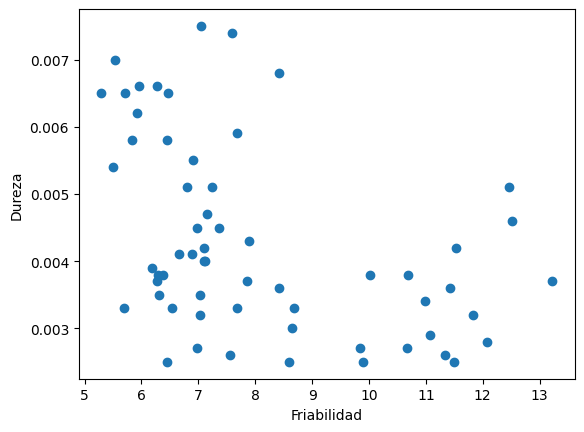

In [39]:
plt.scatter(df['VM[kp]'], df['Friabilidad (%)'])
plt.xlabel('Friabilidad')
plt.ylabel('Dureza')